In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
path_git = 'd:/Git_Proyects/Tesis/Base_Twitter/Tweets_august/'

citas = []
with open(path_git+'muchas_citas_august_medias_700.txt', 'r', encoding = 'utf8') as f:
    Lines = f.readlines()
    for line in Lines:
        citas.append(line)

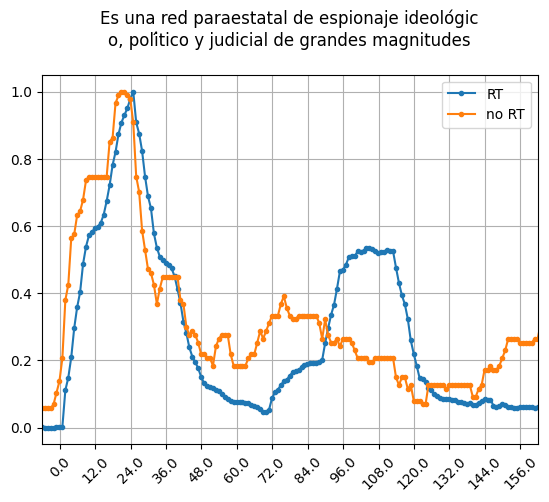

In [153]:
index = 48

df_clus_completo = pd.read_csv(path_git+'Tw_mas_RT_s/Tweets_cluster_con_RT_'+str(index)+'_55.csv')#, dtype={'Tweets':str, 'Fecha':str, 'id':str})
#df_clus_completo = pd.read_csv(path_git+'../Tweets_august/deuda_falopa.csv')
no_medios = ['Twitter for Android', 'Twitter Web App', 'Twitter for iPhone', 'Twitter for iPad', 'Twitter Web Client', 'Mobile Web (M2)', 'Instagram', 'TwotPane for Android', 'Tweetbot for iOS', 'Facebook', 'TweetDeck', 'IFTTT', 'Twitter Media Studio']
def generar_medios(source):
    medios = True
    if source in no_medios or source==np.nan or source == 'NaN':
        medios = False
    return medios

df_clus_completo['medios_2'] = df_clus_completo['source_y'].apply(generar_medios)
# path_git = 'd:/Git_Proyects/Tesis/Base_Twitter/Tw_200_citas_05/'
# #df_clus_completo = pd.read_csv(path_git+'Tweets_cluster_con_RT/no_se_inunda_mas_Macri.csv')
# index = 8
# df_clus_completo = pd.read_csv(path_git+'Tw_'+str(index)+'_Cluster_muchas.csv ')

# df_clus_completo = pd.read_csv(path_git+'../Tweets_cluster_con_RT_Tinelli_055.csv')

df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha_x'], format='%a %b %d %H:%M:%S +0000 %Y')
df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600
#df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - pd.to_datetime('2019-02-27')).dt.total_seconds() / 3600

# fecha_inicial = pd.to_datetime('2023-02-27')
# df_clus_completo = df_clus_completo[df_clus_completo['Fecha'] >= fecha_inicial]
# df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - fecha_inicial).dt.total_seconds() / 3600

categoria = 'RT'

df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

df_categoria = [df_categoria_true, df_categoria_false]
labels = [categoria, 'no '+categoria]
root = 0

plt.figure()
#plt.title('Lo que pasoÃÅ fue que dos dirigentes importantes de Cambiemos no se pusieron de acuerdo en coÃÅmo dirimir sus candidaturas  \n en una interna y llevaron las cosas a un punto en el que hoy vamos a tener dos candidatos que representan el mismo espacio. Es algo que no queriÃÅamos')
firstpart, secondpart = citas[index][:len(citas[index])//2], citas[index][len(citas[index])//2:]
#plt.title(citas[index])
plt.title(firstpart+'\n'+secondpart)
#print(citas[index])
for i, df1 in enumerate(df_categoria):
    df = df1.copy()
    df_index = df.set_index('Fecha')

    df_count_hora = df_index.resample('1H').count()
    #df_count_hora = df_count_hora.reindex(pd.date_range(start=pd.to_datetime('2019-02-25'), end=pd.to_datetime('2019-03-31'), freq='1H'), fill_value=0) # Agrega 0s

    #plt.plot(df_count_hora.index, df_count_hora['Tweets'], label = 'sin rolling window'+str(i)) #Test comparation
    df_suavizado = df_count_hora.rolling('1D', center = True).mean()
    plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.', linestyle = 'solid')
    #plt.plot(df_suavizado.index, df_suavizado['Tweets'], label = labels[i], marker = '.', linestyle = 'solid')


plt.legend()
plt.grid(0.7)




plt.xticks(rotation=45)
plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H'), labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12)-288))
#plt.xticks(np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12))
plt.xlim([datetime(2019, 3, 13), datetime(2019, 3, 20)])
plt.show()
#plt.savefig(path_git+f'/imagenes/imag_{index}.png')


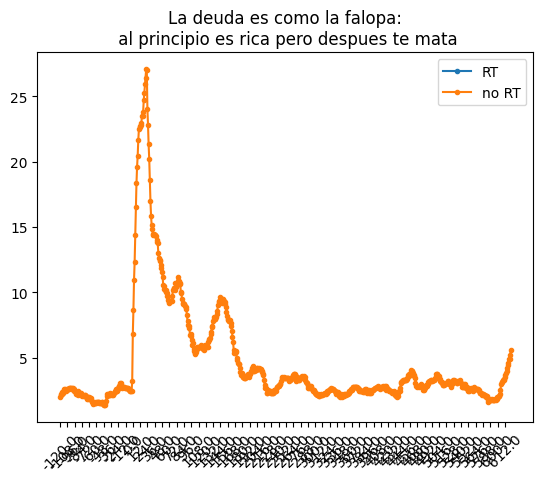

In [37]:
df_clus_completo = pd.read_csv(path_git+'../Tweets_august/inunda_mas_RT.csv')

df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600
#df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - pd.to_datetime('2019-02-27')).dt.total_seconds() / 3600


categoria = 'RT'

df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

df_categoria = [df_categoria_true, df_categoria_false]
labels = [categoria, 'no '+categoria]
root = 0

plt.figure()
plt.title('La deuda es como la falopa:\n al principio es rica pero despues te mata')
for i, df1 in enumerate(df_categoria):
    df = df1.copy()
    df_index = df.set_index('Fecha')

    df_count_hora = df_index.resample('1H').count()
    #df_count_hora = df_count_hora.reindex(pd.date_range(start=pd.to_datetime('2019-02-25'), end=pd.to_datetime('2019-03-31'), freq='1H'), fill_value=0) # Agrega 0s
    #plt.plot(df_count_hora.index, df_count_hora['Tweets'], label = 'sin rolling window'+str(i)) #Test comparation

    df_suavizado = df_count_hora.rolling('1D', center = True).mean()
    #plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.', linestyle = 'solid')
    plt.plot(df_suavizado.index, df_suavizado['Tweets'], label = labels[i], marker = '.', linestyle = 'solid')


plt.legend()
#plt.grid(0.7)




plt.xticks(rotation=45)
plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H'), labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12))-120)
#plt.xlim([datetime(2019, 8, 5), datetime(2019, 8, 12)])
plt.show()
#plt.savefig(path_git+f'/imagenes/imag_{index}.png')

In [35]:
df_clus_completo

Unnamed: 0                   id   
0            135  1158888767530459136  \
1            332  1158893418971574273   
2           1616  1158935101759197184   
3          28489  1159779405239070720   
4          30370  1159837917012824071   
...          ...                  ...   
1343      938302  1162779425714462721   
1344      938843  1162785663864967168   
1345      940459  1162806929791627264   
1346      945446  1162863812283965440   
1347      979451  1163497971280961541   

                                                 Tweets   
0     En el segundo donde dice ‚Äúno se inunda mas‚Äù me...  \
1     No se inunda m√°s... No se inunda m√°s... Carajo...   
2         Parece q si se inunda https://t.co/nBI6PhMfUv   
3     @negra678 Es verdad ... no se inunda m√°s caraj...   
4     @bordo_cristina Cagaban en baldes por culpa de...   
...                                                 ...   
1343  No era que no se inunda maAAAaAsSSs? Tengo el ...   
1344  el paso bajo nivel de lan√∫s sigue inundado y m...   
1345  Confieso que esto que me molest√≥ sobremanera c...   
1346  Uh qu√© gente boba. La frase ‚Äúno se inunda m√°s‚Äù...   
1347  @goodcitizenAR a la derecha la de Macri que no...   

                                             Tw_limpios               Fecha   
0     segundo dice ‚Äú inunda mas ‚Äù hizo acordar Crist... 2019-08-06 23:53:07  \
1     inunda ... inunda ... Carajo .. medio r√≠o ... ... 2019-08-07 00:11:36   
2                                    Parece q si inunda 2019-08-07 02:57:14   
3     negra678 verdad ... inunda carajo ! ! ! ! Jaja... 2019-08-09 10:52:12   
4     bordo_cristina Cagaban baldes culpa chorra jef... 2019-08-09 14:44:42   
...                                                 ...                 ...   
1343       inunda maAAAaAsSSs ? agua rodilla Macri gato 2019-08-17 17:33:13   
1344  paso bajo nivel lan√∫s sigue inundado mientras ... 2019-08-17 17:58:00   
1345  Confieso molest√≥ sobremanera sucedi√≥ , altero ... 2019-08-17 19:22:30   
1346  Uh gente boba . frase ‚Äú inunda ‚Äù hace referenc... 2019-08-17 23:08:32   
1347  goodcitizenAR derecha Macri inunda mas carajoo... 2019-08-19 17:08:27   

                                                   urls  medios   
0     https://twitter.com/todonoticias/status/115878...   False  \
1                                                   NaN   False   
2     https://m.ambito.com/alberto-y-cristina-ya-ara...   False   
3                                                   NaN   False   
4                                                   NaN   False   
...                                                 ...     ...   
1343                                                NaN   False   
1344                                                NaN   False   
1345                       https://youtu.be/etUd6NuaIx8   False   
1346                                                NaN   False   
1347                                                NaN   False   

                   source  HorasDesdeInicio  
0      Twitter for iPhone        138.764167  
1     Twitter for Android        139.072222  
2                Facebook        141.832778  
3     Twitter for Android        197.748889  
4      Twitter for iPhone        201.623889  
...                   ...               ...  
1343   Twitter for iPhone        396.432500  
1344   Twitter for iPhone        396.845556  
1345   Twitter Web Client        398.253889  
1346   Twitter for iPhone        402.021111  
1347  Twitter for Android        444.019722  

[1348 rows x 9 columns]

In [36]:
for i in df_clus_completo['Tweets'][30:50]:
    print(i)

@Eonito @WaterTypeOP Ya ya, pero qu√© pas√≥?
Todos: los pijazos de agua.

Reportero: las lluvias asociadas al paso de la onda del Este. https://t.co/7AuTezYa4k
@fvrnandiito_ Ah, que es penaco, entonces paso, que mierda de agua, bro, te estas intoxicando
Y de paso no riegan medio inodoro üòâ https://t.co/6vSWQDnKLw
a mi vecino se le inund√≥ el dpto y es tan in√∫til q no sabe c√≥mo cerrar el paso del agua.. lo √∫nico q espero es q no se me haya entrado agua a m√≠ tamb , porq lo mato üåùüåùüåùüåù
@MiliberMancilla Te pas√≥ lo mismo que a m√≠! Ahora las pobres est√°n enchambranadas!
PD: Perd√≥n si el t√©rmino no es correcto pero as√≠ nos dec√≠a mi madre ya fallecida cuando todo estaba saturado de agua.
@HIDROCAPITALca @VasquezF_Evelyn Se sigue botando el agua y cada vez mas hundido el pavimento en la Calle La Monta√±a El Para√≠so, Caracas. POR FAVOR URGENTE reparen tuber√≠a rota, son miles de litros bot√°ndose y no hay paso a nuestras casas. AUXILIO !!!
Y ya de paso... va a hacer algo 

In [48]:
min(df_clus_completo[df_clus_completo['RT'] == False]['Fecha_x'])

'Fri Mar 08 18:08:18 +0000 2019'

In [25]:
for i in df_clus_completo['Tweets'].head(30):
    print(i,'  fin')

"Los gritos, los insultos, no hablan de m√≠: hablan de ustedes"
MACRI 2019   fin
"Los insultos no hablan de mi, sinl de ustedes" lo √∫nico cierto que dijo Macri en todo su mandato   fin
Macri textual: se√±ores: los gritos e insultos no hablan de mi..hablan de ustedes..as√≠ se descalifica con educacion‚Ä¶ https://t.co/Anrj3hj8Nf   fin
Mauricio Macri en el #Congreso, a los kirchneristas: "Los gritos y los insultos no hablan de m√≠, hablan de ustedes,‚Ä¶ https://t.co/HbwLwfPLXe   fin
"Sus insultos no hablan de mi , hablan de como son ustedes" -Mauricio Macri 
Crack crack üëèüèª   fin
"Los gritos y los insultos no hablan de m√≠, hablan de ustedes, se√±ores" https://t.co/d4LNR8YDtX   fin
"Los gritos y los insultos no me definen a m√≠. Los definen a ustedes..." Digan lo que quieran, pero que tremendo or‚Ä¶ https://t.co/4hJYTHdAFG   fin
"Los gritos e insultos no hablan de m√≠, hablan de ustedes."
Presidente Mauricio Macri. 
1 marzo 2019.   fin
Dijo Macri: "Insisto, sus insultos, sus gritos,

In [ ]:
for i in range(700):
    try:
        df_clus_completo = pd.read_csv(path_git+'Tw_700_citas_55/Tw_'+str(i)+'_Cluster_muchas.csv')

        df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
        df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600
        #df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - pd.to_datetime('2019-02-27')).dt.total_seconds() / 3600


        # categoria = 'RT'

        # df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
        # df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

        # df_categoria = [df_categoria_true, df_categoria_false]
        # labels = [categoria, 'no '+categoria]
        # root = 0

        plt.figure()
        firstpart, secondpart = citas[i][:len(citas[i])//2], citas[i][len(citas[i])//2:]
        #plt.title(citas[index])
        plt.title(firstpart+'\n'+secondpart)
        df_index = df_clus_completo.set_index('Fecha')
        df_count_hora = df_index.resample('1H').count()
        df_suavizado = df_count_hora.rolling('1D', center = True).mean()
        plt.plot(df_suavizado.index, df_suavizado['Tweets'], marker = '.', linestyle = 'solid')

        #plt.title('La deuda es como la falopa:\n al principio es rica pero despues te mata')
        # for i, df1 in enumerate(df_categoria):
        #     df = df1.copy()
        #     df_index = df.set_index('Fecha')

        #     df_count_hora = df_index.resample('1H').count()
        #     #df_count_hora = df_count_hora.reindex(pd.date_range(start=pd.to_datetime('2019-02-25'), end=pd.to_datetime('2019-03-31'), freq='1H'), fill_value=0) # Agrega 0s
        #     #plt.plot(df_count_hora.index, df_count_hora['Tweets'], label = 'sin rolling window'+str(i)) #Test comparation

        #     df_suavizado = df_count_hora.rolling('1D', center = True).mean()
        #     #plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.', linestyle = 'solid')
        #     plt.plot(df_suavizado.index, df_suavizado['Tweets'], label = labels[i], marker = '.', linestyle = 'solid')


        # plt.legend()
        #plt.grid(0.7)




        plt.xticks(rotation=45)
        #plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H'), labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12))-120)
        #plt.xlim([datetime(2019, 8, 5), datetime(2019, 8, 12)])
        plt.savefig(path_git+f'/imagenes_700_55/imag_{i}.png', dpi = 800)
    except:
        pass


(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(18109.0, 0, '2019-08-01'),
  Text(18113.0, 0, '2019-08-05'),
  Text(18117.0, 0, '2019-08-09'),
  Text(18121.0, 0, '2019-08-13'),
  Text(18125.0, 0, '2019-08-17'),
  Text(18129.0, 0, '2019-08-21'),
  Text(18133.0, 0, '2019-08-25'),
  Text(18137.0, 0, '2019-08-29'),
  Text(18140.0, 0, '2019-09-01')])

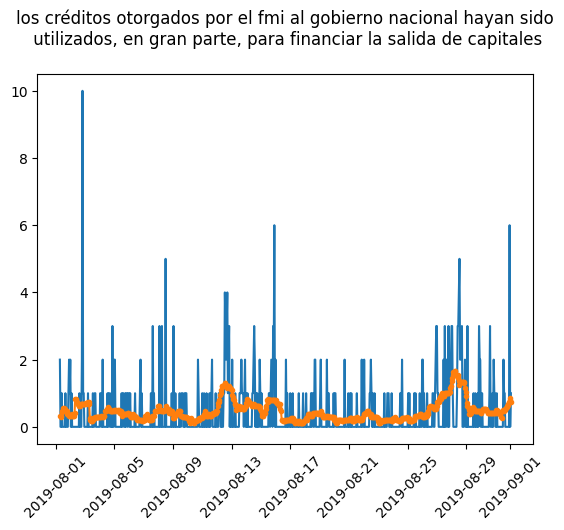

In [131]:
i = 97
df_clus_completo = pd.read_csv(path_git+'Tw_200_citas_55/Tw_'+str(i)+'_Cluster_muchas.csv')

df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600
plt.figure()
firstpart, secondpart = citas[i][:len(citas[i])//2], citas[i][len(citas[i])//2:]
#plt.title(citas[index])
plt.title(firstpart+'\n'+secondpart)
df_index = df_clus_completo.set_index('Fecha')
df_count_hora = df_index.resample('1H').count()
df_suavizado = df_count_hora.rolling('1D', center = True).mean()
plt.plot(df_count_hora.index, df_count_hora['Tweets'])
plt.plot(df_suavizado.index, df_suavizado['Tweets'], marker = '.', linestyle = 'solid')

#plt.grid(0.7)




plt.xticks(rotation=45)
#plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H'), labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12))-120)
#plt.xlim([datetime(2019, 8, 5), datetime(2019, 8, 12)])


In [105]:
j = 94
df_clus_completo = pd.read_csv(path_git+'Tw_200_citas_55/Tw_'+str(j)+'_Cluster_muchas.csv')
#df_clus_completo[ df_clus_completo['Fecha']>= pd.to_datetime('2019-08-24')]

print(citas[j], '\n')
for i in df_clus_completo['Tweets'][20:40]:
    print(i)

este triunfo es de ellos, la gente vota con conciencia, con el corazoÃÅn
 

Voten a Espert o Centuri√≥n gente, total no ganan ni a palo y de paso a Macri y Cristina les damos un buen susto https://t.co/FTz8BEzYFk
Esta es la boleta de TOD‚òÄÔ∏èS, la que representa el proyecto que encabeza Alberto y Cristina en la Naci√≥n, Axel en la Provincia y nosotros en Marcos Paz.

Este domingo llenemos las urnas de votos y desatemos la esperanza!

#MarcosPazSomosTodos
#RicardoIntendente
#Lista2 https://t.co/sT7xgUlPb9
Estar√≠a buen√≠simo que cada uno VOTE a quien quiera VOTAR, y que dejemos de agredirnos unos con otros por pensar distinto. 
C√≥mo si se van a convencer porque te digan VOTA A MACRI,VOTA A CRISTINA! 
Voto a quien yo considero que tengo que votar, por mi experiencia.
El acto de ayer mostr√≥ la alegr√≠a nuevamente en las calles. Por un pa√≠s m√°s inclusivo, con consumo y trabajo
#AlbertoPresidente

https://t.co/AfMXfxxrI4
No entiendo la gente que vota a cristina* https://t.co/8b2Wjo8Dyf

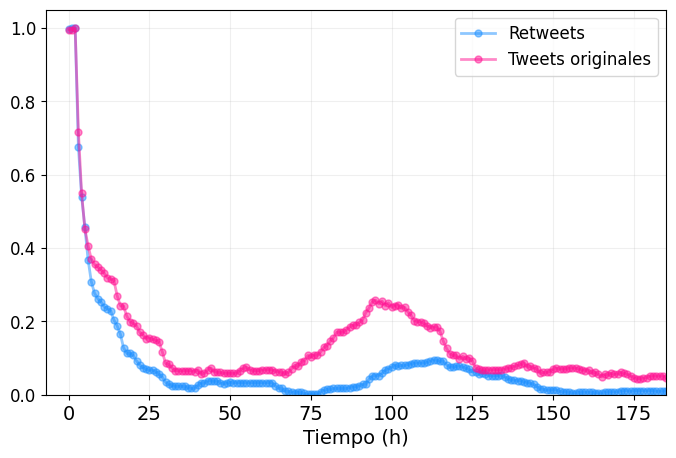

In [183]:
index = 140

df_clus_completo = pd.read_csv(path_git+'../Tweets_august/Tw_mas_RT/Tw_'+str(index)+'_Cluster_muchas.csv_RT_55.csv')

df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')
df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600
#df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - pd.to_datetime('2019-02-27')).dt.total_seconds() / 3600


categoria = 'RT'

df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

df_categoria = [df_categoria_true, df_categoria_false]
labels = [categoria, 'no '+categoria]
root = 0

plt.figure(figsize=(8,5))#, dpi = 300)
firstpart, secondpart = citas[index][:len(citas[index])//2], citas[index][len(citas[index])//2:]
#plt.title(citas[index])
#plt.title(firstpart+'\n'+secondpart)
#plt.title('La deuda es como la falopa:\n al principio es rica pero despues te mata')
colores = ['dodgerblue', 'deeppink']
for i, df1 in enumerate(df_categoria):

    df = df1.copy()
    df_index = df.set_index('Fecha')

    df_count_hora = df_index.resample('1H').count()
    #df_count_hora = df_count_hora.reindex(pd.date_range(start=pd.to_datetime('2019-02-25'), end=pd.to_datetime('2019-03-31'), freq='1H'), fill_value=0) # Agrega 0s
    #plt.plot(df_count_hora.index, df_count_hora['Tweets'],label = 'sin rolling window'+str(i),) #Test comparation

    df_suavizado = df_count_hora.rolling('1D', center = True).mean()
    
    fecha_objetivo = pd.to_datetime('2019-08-08 06:00:00', format='%Y-%m-%d %H:%M:%S')
    # fecha_objetivo = pd.to_datetime('2019-08-25')
    df_suavizado = df_suavizado[df_suavizado.index>fecha_objetivo]
    
    plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.',  alpha  = 0.5, color = colores[i], markersize = 10, linewidth = 2,linestyle = 'solid')
    #plt.plot(df_suavizado.index, df_suavizado['Tweets'], label = labels[i], marker = '.', linestyle = 'solid')

#plt.legend()
plt.legend(['Retweets', 'Tweets originales'], fontsize = 12)
plt.xlabel('Tiempo (h)', size= 14)
plt.grid(alpha = 0.2)


df_suavizado['horas'] = pd.to_datetime(df_suavizado.index, format='%Y-%m-%d %H:%M:%S')
inicio =(df_suavizado['horas']-min(df_suavizado['horas'])).dt.total_seconds()/3600

plt.xticks()
#plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H'), labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12))-168-360)
#plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='25H'), labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 25)-175), fontsize = 14)
#plt.xticks(pd.date_range(start=df_suavizado['horas'].min(), end=df_suavizado['horas'].max(), freq='25H'), labels= (np.arange(df_suavizado['horas'].min(), df_suavizado['horas'].max(), 25)), fontsize = 14)
plt.xticks(pd.date_range(start=df_suavizado['horas'].min(), end=df_suavizado[df_suavizado['horas']< pd.to_datetime('2019-08-17 00:00:00', format='%Y-%m-%d %H:%M:%S')]['horas'].max(), freq='25H'), labels = [0, 25, 50, 75, 100, 125, 150, 175, 200], fontsize =14)
plt.yticks(fontsize = 12)
plt.xlim([datetime(2019, 8,8), datetime(2019, 8,16)])
plt.ylim([0,1.05])
plt.savefig(path_git+f'imagen_140.png', dpi = 300)
plt.show()

In [179]:
citas[140]

'estaÃÅn todos muy preocupados por coÃÅmo me voy a llevar con cristina. nunca maÃÅs me voy a pelear con cristina porque vamos a hacer la argentina que todos ustedes merecen\n'

In [180]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('hiiamsid/sentence_similarity_spanish_es')  

C:\Users\Ale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [184]:
import numpy as np
from numpy.linalg import norm  
def cosine_similarity(A, B):
    return np.dot(A, B) / (norm(A) * norm(B))

frase1 = 'Estamos en la reunion anual de f√≠sica'
frase2 = 'El a√±o pasado fue en Bariloche'

f1 = model.encode(frase1)
f2 = model.encode(frase2)

cosine_similarity(f1,f2)

0.22354972

In [231]:
j = 140
df_clus_completo = pd.read_csv(path_git+'../Tweets_august/Tw_mas_RT/Tw_'+str(j)+'_Cluster_muchas.csv_RT_55.csv')
#df_clus_completo[ df_clus_completo['Fecha']>= pd.to_datetime('2019-08-24')]

print(citas[j], '\n')
for i in df_clus_completo['Tweets'][80:100]:
    print(i)

estaÃÅn todos muy preocupados por coÃÅmo me voy a llevar con cristina. nunca maÃÅs me voy a pelear con cristina porque vamos a hacer la argentina que todos ustedes merecen
 

#Elecciones2019
"Nunca m√°s me peleo con Cristina"

https://t.co/5jR5Way0It
"Nunca m√°s me voy a pelear con Cristina". Al capit√°n Beto lo coachea el ecuatoriano
"Nunca me pele√© con Cristina ni lo volver√© a hacer"
Albertiter dice nunca m√°s me voy a pelear con Cristina, te pron√≥stico hasta el lunes que te va a echar la culpa de todo pelotudo
"Nunca m√°s me voy a pelear con Cristina" ‚ù§  @alferdez que as√≠ sea ‚úå
Nunca m√°s me voy a pelear con Cristina = piel de gallina
"Nunca m√°s me voy a pelear con Cristina Kirchner" : Alberto Fern√°ndez, los mismo dijo alrevez +A 10dias antes de unirse a cfk, NADIE puede creerles, igual al otro lado de la grieta, c/u con su relato!
Alberto dijo una frase en la cual hace referencia a su reencuentro con Cristina, esta dice "Yo con cristina no me peleo nunca m√°s"
dice "ALBER